In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [2]:
ipl = pd.read_csv("C:/project/IPL_Score_Prediction_Deep Learning/ipl_data.csv")
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
#Dropping certain features 
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [4]:
X = df.drop(['total'], axis =1)
y = df['total']

In [5]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [6]:
# Train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [9]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 54.6454 - val_loss: 22.5597
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.5867 - val_loss: 22.0345
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2938 - val_loss: 21.9627
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2966 - val_loss: 21.9243
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2923 - val_loss: 22.2221
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.4013 - val_loss: 22.3738
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2493 - val_loss: 21.8191
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.0404 - val_loss: 22.1987
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 21.8858 - val_loss: 22.1605
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.1255 - val_loss: 21.7779
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 21.9618 - val_loss: 22.0012
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

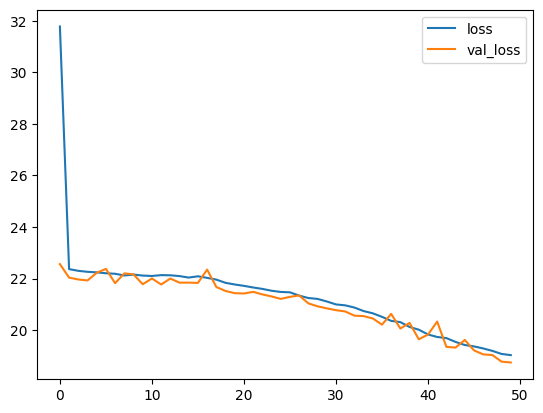

In [10]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [11]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


19.2317072089893

In [14]:
import gradio as gr
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")

# Assume the encoders, scaler, and model have been trained and loaded
# Example:
# venue_encoder = LabelEncoder().fit(df['venue'])
# batting_team_encoder = LabelEncoder().fit(df['bat_team'])
# bowling_team_encoder = LabelEncoder().fit(df['bowl_team'])
# striker_encoder = LabelEncoder().fit(df['batsman'])
# bowler_encoder = LabelEncoder().fit(df['bowler'])
# scaler = MinMaxScaler().fit(X_train)  # Using your training data for fitting
# model = tf.keras.models.load_model('your_model.h5')

# Prediction function
def predict_score(venue, batting_team, bowling_team, striker, bowler):
    try:
        # Encode the inputs
        encoded_venue = venue_encoder.transform([venue])[0]
        encoded_batting_team = batting_team_encoder.transform([batting_team])[0]
        encoded_bowling_team = bowling_team_encoder.transform([bowling_team])[0]
        encoded_striker = striker_encoder.transform([striker])[0]
        encoded_bowler = bowler_encoder.transform([bowler])[0]

        # Combine inputs into a single array
        input_data = np.array([encoded_venue, encoded_batting_team, encoded_bowling_team, encoded_striker, encoded_bowler])
        input_data = input_data.reshape(1, -1)
        scaled_input = scaler.transform(input_data)

        # Make prediction
        predicted_score = model.predict(scaled_input)
        return f"Predicted Total Score: {int(predicted_score[0, 0])}"
    except Exception as e:
        return f"Error: {str(e)}"

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_score,
    inputs=[
        gr.Dropdown(choices=df['venue'].unique().tolist(), label="Select Venue"),
        gr.Dropdown(choices=df['bat_team'].unique().tolist(), label="Select Batting Team"),
        gr.Dropdown(choices=df['bowl_team'].unique().tolist(), label="Select Bowling Team"),
        gr.Dropdown(choices=df['batsman'].unique().tolist(), label="Select Striker"),
        gr.Dropdown(choices=df['bowler'].unique().tolist(), label="Select Bowler"),
    ],
    outputs="text",
    title="IPL Score Predictor",
    description="Predict the total score based on match conditions and player stats."
)

# Launch the interface
interface.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Created dataset file at: .gradio\flagged\dataset1.csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
